### CNN on CIFAR10 dataset

#### The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [27]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

#normalize pixel values to be between 0 and 1
train_images,test_images=train_images/255.0 ,test_images/255.0

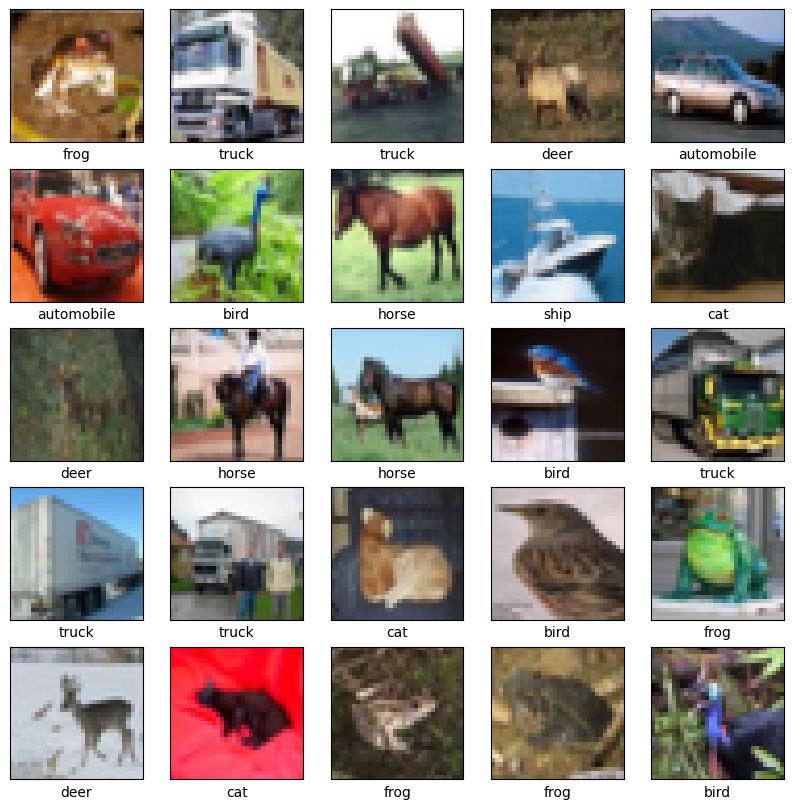

In [28]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    
    #the CIFAR labels happen to be arrays,which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

In [29]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))     # 3 is color channel
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))

### Add dense layers on top

In [30]:
model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(10))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 13ms/step - loss: 1.5208 - accuracy: 0.4465 - val_loss: 1.2177 - val_accuracy: 0.5671
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1409 - accuracy: 0.5954 - val_loss: 1.0486 - val_accuracy: 0.6318
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9940 - accuracy: 0.6517 - val_loss: 1.0138 - val_accuracy: 0.6452
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8997 - accuracy: 0.6855 - val_loss: 0.9294 - val_accuracy: 0.6762
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8314 - accuracy: 0.7082 - val_loss: 0.9059 - val_accuracy: 0.6838
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7783 - accuracy: 0.7282 - val_loss: 0.9173 - val_accuracy: 0.6831
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7277 - accuracy: 0.7435 - val_loss: 0.9227 -

### Evaluate the model

313/313 - 2s - loss: 0.8714 - accuracy: 0.7130 - 2s/epoch - 5ms/step


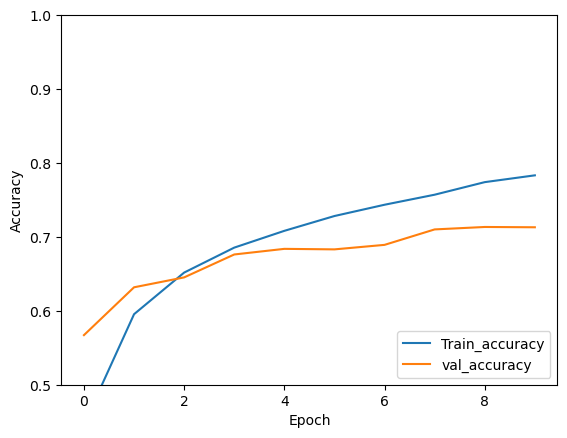

In [33]:
plt.plot(history.history['accuracy'],label='Train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

In [34]:
print(test_acc)

0.7129999995231628


### With regularization techniques

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16   #transfer learning
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# load and preprocess the cifar10 dataset
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
train_images=train_images.astype('float32')/255.0
test_images=test_images.astype('float32')/255.0
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [11]:
# data augmentation to prevent overfitting  (image generator - tensorflow)
datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)

In [12]:
#earlystopping callback 
early_stopping=EarlyStopping(monitor='val_loss',patience=3 ,restore_best_weights=True)

In [13]:
# define the cnn model with different regularization techniques
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_regularizer=l1(0.01)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))  #to prevent overfitting  50% node silence
model.add(Dense(10,activation='softmax'))

### compile the model

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
# train the model with data augmentation and early stopping
history=model.fit(datagen.flow(train_images,train_labels,batch_size=64),
                 steps_per_epoch=len(train_images)/64,
                  epochs=20,
                  validation_data=(test_images,test_labels),
                  callbacks=[early_stopping])  #refer other methods

Epoch 1/20
781/781 [==============================] - 47s 59ms/step - loss: 2.5607 - accuracy: 0.1949 - val_loss: 2.0474 - val_accuracy: 0.2356
Epoch 2/20
781/781 [==============================] - 38s 49ms/step - loss: 2.1004 - accuracy: 0.2185 - val_loss: 2.0175 - val_accuracy: 0.2633
Epoch 3/20
781/781 [==============================] - 39s 50ms/step - loss: 2.0575 - accuracy: 0.2334 - val_loss: 1.9648 - val_accuracy: 0.2812
Epoch 4/20
781/781 [==============================] - 49s 63ms/step - loss: 2.0144 - accuracy: 0.2606 - val_loss: 1.8969 - val_accuracy: 0.3162
Epoch 5/20
781/781 [==============================] - 45s 58ms/step - loss: 1.9952 - accuracy: 0.2714 - val_loss: 1.8677 - val_accuracy: 0.3311
Epoch 6/20
781/781 [==============================] - 46s 58ms/step - loss: 1.9810 - accuracy: 0.2804 - val_loss: 1.8838 - val_accuracy: 0.3205
Epoch 7/20
781/781 [==============================] - 44s 57ms/step - loss: 1.9648 - accuracy: 0.2895 - val_loss: 1.9621 - val_accuracy:

In [16]:
# load pre_trained model for tranfer learning
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
base_model.trainable=False

In [17]:
transfer_model=Sequential([
    base_model,
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [20]:
transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


In [21]:
#train the transfer learning model
history_transfer=transfer_model.fit(train_images,train_labels,
                                  epochs=10,
                                  batch_size=64,
                                  validation_data=(test_images,test_labels))

Epoch 1/10
782/782 [==============================] - 146s 182ms/step - loss: 1.5804 - accuracy: 0.4437 - val_loss: 1.3432 - val_accuracy: 0.5307
Epoch 2/10
782/782 [==============================] - 137s 175ms/step - loss: 1.3579 - accuracy: 0.5284 - val_loss: 1.2467 - val_accuracy: 0.5638
Epoch 3/10
782/782 [==============================] - 137s 175ms/step - loss: 1.2986 - accuracy: 0.5467 - val_loss: 1.2228 - val_accuracy: 0.5710
Epoch 4/10
782/782 [==============================] - 135s 173ms/step - loss: 1.2629 - accuracy: 0.5609 - val_loss: 1.2050 - val_accuracy: 0.5799
Epoch 5/10
782/782 [==============================] - 138s 176ms/step - loss: 1.2387 - accuracy: 0.5686 - val_loss: 1.1762 - val_accuracy: 0.5863
Epoch 6/10
782/782 [==============================] - 153s 196ms/step - loss: 1.2211 - accuracy: 0.5751 - val_loss: 1.1709 - val_accuracy: 0.5906
Epoch 7/10
782/782 [==============================] - 142s 182ms/step - loss: 1.2055 - accuracy: 0.5800 - val_loss: 1.1660 -

### Model evaluation

In [22]:
# evaluate the base cnn model
base_model_evaluation=model.evaluate(test_images,test_labels)
print('Base CNN model - test loss: ',base_model_evaluation[0])
print('Base CNN model - test accuracy: ',base_model_evaluation[1])

313/313 [==============================] - 3s 9ms/step - loss: 1.7002 - accuracy: 0.4121
Base CNN model - test loss:  1.7001577615737915
Base CNN model - test accuracy:  0.4120999872684479


In [23]:
# evaluate transfer learning model
transfer_model_evaluation=transfer_model.evaluate(test_images,test_labels)
print('Transfer learning model - test loss: ',transfer_model_evaluation[0])
print('Transfer learning model - test accuracy: ',transfer_model_evaluation[1])

313/313 [==============================] - 29s 93ms/step - loss: 1.1468 - accuracy: 0.5956
Transfer learning model - test loss:  1.1467899084091187
Transfer learning model - test accuracy:  0.5956000089645386


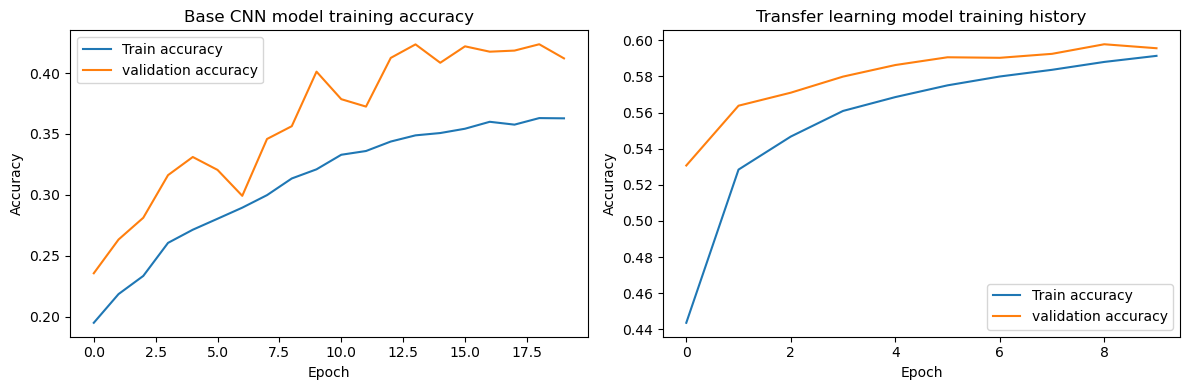

In [24]:
import matplotlib.pyplot as plt
#plot training and validation accuracy
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Base CNN model training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_transfer.history['accuracy'],label='Train accuracy')
plt.plot(history_transfer.history['val_accuracy'],label='validation accuracy')
plt.title('Transfer learning model training history')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

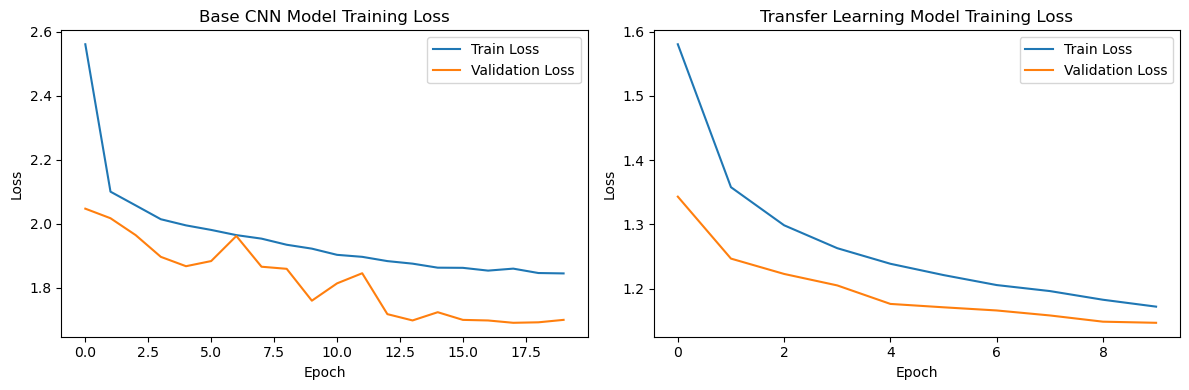

In [25]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Base CNN Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Train Loss')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
model.save('minstmodel3.keras')